#### Model Compilation

In [1]:
import amici
import numpy as np
import matplotlib.pyplot as plt

sbml_file = '/SBML/PyPESTO/FRP/sbml_model.xml'
sbml_importer = amici.SbmlImporter(sbml_file)

In [2]:
constant_parameters = ["kd", "f"]
observables = {"observable_A": {'formula': 'A'},
               "observable_B": {'formula': 'B'},}


In [3]:
model_name = 'FRP'
model_output_dir = 'tmp/' + model_name
sbml_importer.sbml2amici(
    model_name, 
    model_output_dir, 
    verbose=False,
    observables=observables,
    constant_parameters=constant_parameters
)

#### Loading the model module

In [4]:
# Load the model module
model_module = amici.import_model_module(model_name, model_output_dir)

# Instantiate model
model = model_module.getModel()

# Instantiate solver
solver = model.getSolver()

In [5]:
print("Model parameters: ", list(model.getParameterIds()))
print("Model observables:", list(model.getObservableIds()))
print("Model states:     ", list(model.getStateIds()))

Model parameters:  ['kpAA', 'kpAB', 'kpBA', 'kpBB']
Model observables: ['observable_A', 'observable_B']
Model states:      ['I', 'R', 'A', 'B', 'RA', 'RB', 'PAA', 'PAB', 'PBA', 'PBB']


In [6]:
# model.setParameterByName('kd', 1e10)
model.setParameterByName('kpAA', 2.0)
model.setParameterByName('kpAB', 0.5)
model.setParameterByName('kpBA', 10.0)
model.setParameterByName('kpBB', 5.0)
print(model.getParameters())

solver.setAbsoluteTolerance(1e-10)



(2.0, 0.5, 10.0, 5.0)


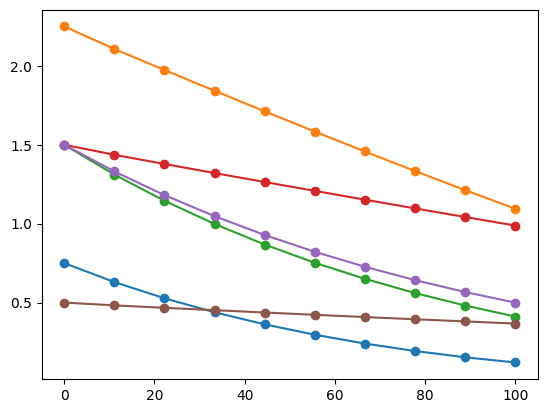

In [7]:
fAs = [0.25, 0.5, 0.75]
cM0s = [3.0, 3.0, 2.0]
timepoints = np.linspace(0, 100, 10)
rdata = None
for i, fA in enumerate(fAs):
    cM0 = cM0s[i]
    cA0 = fA*cM0
    cB0 = (1-fA)*cM0
    model.setInitialStates([5e-3, 0, cA0, cB0, 0, 0, 0, 0, 0, 0])
    
    model.setTimepoints(timepoints)
    rdata = amici.runAmiciSimulation(model, solver)
    
    plt.plot(rdata.ts, rdata.by_id('A'), 'o-')
    plt.plot(rdata.ts, rdata.by_id('B'), 'o-')

In [8]:
edata: amici.ExpData = amici.ExpData(rdata, 0.1, 0.0)
# edata.fixedParameters = [0, 2]
rdata = amici.runAmiciSimulation(model, solver, edata)
# amici.plotting.plotObservableTrajectories(rdata)


In [9]:
import petab

In [10]:
petab.conditions.create_condition_df(['A0', 'B0'], ['c1', 'c2', 'c3'])

,A0,B0
conditionId,,
c1,NaN,NaN
c2,NaN,NaN
c3,NaN,NaN


In [11]:
def write_experimental_data():
    return

# Observables are A,B, conditions are name, A, B, 

#### Running Model Simulations

In [12]:
import numpy as np

model.setTimepoints(timepoints)
rdata = amici.runAmiciSimulation(model, solver)

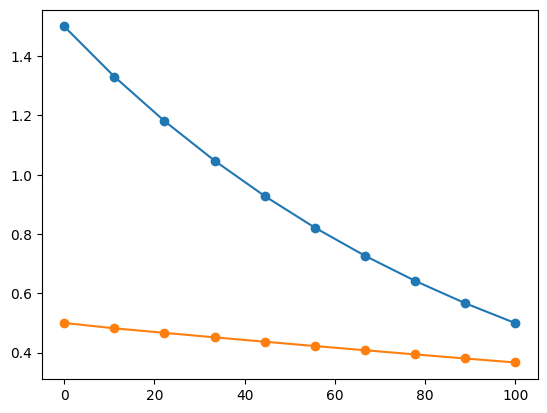

In [13]:
import matplotlib.pyplot as plt

plt.plot(rdata.ts, rdata.by_id('A'), 'o-')
plt.plot(rdata.ts, rdata.by_id('B'), 'o-')

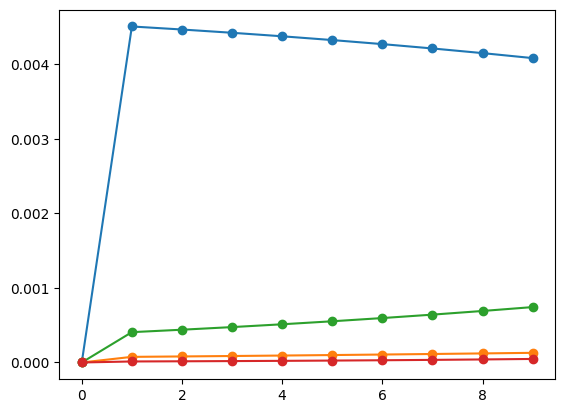

In [14]:
plt.plot(rdata.by_id('PAA'), 'o-')
plt.plot(rdata.by_id('PAB'), 'o-')
plt.plot(rdata.by_id('PBA'), 'o-')
plt.plot(rdata.by_id('PBB'), 'o-')

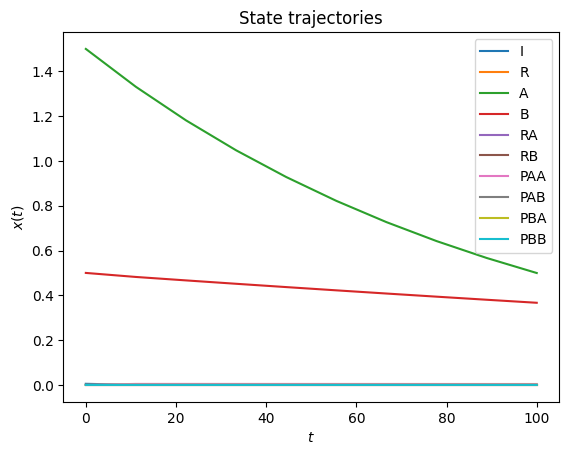

In [15]:
import amici.plotting
amici.plotting.plot_state_trajectories(rdata, model=None)

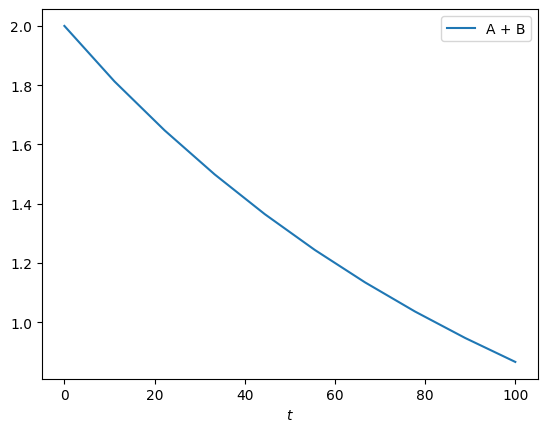

In [16]:
amici.plotting.plot_expressions(
    "A + B", rdata=rdata
)

In [17]:
for key, value in rdata.items():
    print("%12s: " % key, value)

          ts:  [  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
           x:  [[ 5.00000000e-003  0.00000000e+000  1.50000000e+000  5.00000000e-001
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-1.46292726e-312  9.68975584e-016  1.33075500e+000  4.81972636e-001
  -1.97202168e-011  1.39436714e-015  4.50457387e-003  7.52684064e-005
   4.06541996e-004  1.36157480e-005]
 [-6.52166653e-322  1.80366545e-014  1.18103132e+000  4.66599117e-001
  -4.89719549e-012 -3.75890648e-014  4.46391463e-003  8.08438177e-005
   4.39290967e-004  1.59505935e-005]
 [ 0.00000000e+000  1.86327948e-013  1.04738332e+000  4.51529329e-001
  -7.76739548e-011 -1.05135776e-012  4.42014163e-003  8.67515091e-005
   4.74432804e-004  1.86741366e-005]
 [ 0.00000000e+000 -5.88013821e-014  9.28114757e-001  4.36749232e-001
   1.07481963e-011  3.56062150e-012  4.37305545e-003  9.299

In [18]:
edata = amici.ExpData(rdata, 0.0001, 0.0)
rdata = amici.runAmiciSimulation(model, solver, edata)
# amici.plotting.plotObservableTrajectories(edata)

In [19]:
# plt.plot(np.array(edata.getObservedData()).reshape()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function for analytical_a (obs_a)

# def analytical_a(t, a0, b0, k1=0.8, k2=0.6):
#     return k2 * (a0 + b0) / (k1 + k2) + (
#         k2 * (a0 + b0) / (k1 + k2)
#     ) * np.exp((-k1 - k2) * t)
    
# def analytical_a(t, a0, b0, k1=0.8, k2=0.6):
#     return k2 * (a0 + b0) / (k1 + k2) + (
#         np.abs(k1*a0 - k2*b0) / (k1 + k2)
#     ) * np.exp(-(k1 + k2)*t)

k1_true = 0.5
k2_true = 0.05

def analytical_a(t, a0, b0, k1=0.5, k2=0.05):
    alpha = k1 + k2
    beta = k2 * (a0 + b0)
    
    return beta / alpha + np.abs(alpha*a0 - beta)/alpha * np.exp(-alpha*t)


# conditions = [(1.25, 0.25), (1.5, 0.3), (1.75, 0.35)]  # Example conditions
# condition_names = ['c1', 'c2', 'c3', 'c4']
fA0s = [0.25, 0.5, 0.75]
M0 = 3.0
conditions = [(fA0*M0, (1-fA0)*M0) for fA0 in fA0s]
num_conditions = len(conditions)
times = np.linspace(0, 3, 10)
sigma = 0.00

# Initialize an empty dataframe
measurement_df = pd.DataFrame(columns=['observableId', 'simulationConditionId', 'time', 'measurement'])

conditions_data = []

for i, (cA0, cB0) in enumerate(conditions, start=1):
    
    model.setInitialStates([5e-3, 0, cA0, cB0, 0, 0, 0, 0, 0, 0])
    
    # timepoints = 
    model.setTimepoints(timepoints)
    rdata = amici.runAmiciSimulation(model, solver)
    
    # plt.plot(rdata.ts, rdata.by_id('A'), 'o-')
    # plt.plot(rdata.ts, rdata.by_id('B'), 'o-')
    
    meas_a = rdata.by_id('A') + sigma * np.random.randn(len(timepoints))
    meas_b = rdata.by_id('B') + sigma * np.random.randn(len(timepoints))
    
    # measurements_a = [analytical_a(t, a0, b0, k1_true, k2_true) for t in times] + sigma * np.random.randn(len(times))
    # measurements_b = a0 + b0 - measurements_a

    # Create dataframes for obs_a and obs_b
    df_a = pd.DataFrame({
        'observableId': ['obs_a'] * len(timepoints),
        'simulationConditionId': [f'c_{i}'] * len(timepoints),
        'time': timepoints,
        'measurement': meas_a
    })

    df_b = pd.DataFrame({
        'observableId': ['obs_b'] * len(timepoints),
        'simulationConditionId': [f'c_{i}'] * len(timepoints),
        'time': timepoints,
        'measurement': meas_b
    })

    # Append to the main dataframe
    measurement_df = pd.concat([measurement_df, df_a, df_b], ignore_index=True)
    # measurement_df = pd.concat([measurement_df, df_a], ignore_index=True)
    
    # Add to conditions data
    # conditions_data.append({'conditionId': f'c_{i}', 'a0': a0, 'b0': b0})
    conditions_data.append({
                            'conditionId': f'c_{i}', 
                            'conditionName': f'c_{i}',
                            'A': cA0,
                            'B': cB0})

# exit()
# Convert conditions data to dataframe
conditions_df = pd.DataFrame(conditions_data)

print(conditions_df)
print(measurement_df)
# Save the dataframe to a file
measurement_df.to_csv('/SBML/PyPESTO/FRP/FRP_model/multiple_conditions/measurements.tsv', sep='\t', index=False)
conditions_df.to_csv('/SBML/PyPESTO/FRP/FRP_model/multiple_conditions/conditions.tsv', sep='\t', index=False)
# measurement_df.to_csv('doc/example/TEST_conversion_reaction/multiple_conditions/measurements.tsv', sep='\t', index=False)
# measurement_df.to_csv('/SBML/PyPESTO/TEST_conversion/TEST_conversion_reaction/measurements.tsv', sep='\t', index=False)

# conditions_df.to_csv('/SBML/PyPESTO/TEST_conversion/TEST_conversion_reaction/multiple_conditions/conditions.tsv', sep='\t', index=False)

  conditionId conditionName     A     B
0         c_1           c_1  0.75  2.25
1         c_2           c_2  1.50  1.50
2         c_3           c_3  2.25  0.75
   observableId simulationConditionId        time  measurement
0         obs_a                   c_1    0.000000     0.750000
1         obs_a                   c_1   11.111111     0.629642
2         obs_a                   c_1   22.222222     0.527035
3         obs_a                   c_1   33.333333     0.438198
4         obs_a                   c_1   44.444444     0.361636
5         obs_a                   c_1   55.555556     0.295999
6         obs_a                   c_1   66.666667     0.240070
7         obs_a                   c_1   77.777778     0.192747
8         obs_a                   c_1   88.888889     0.153030
9         obs_a                   c_1  100.000000     0.120006
10        obs_b                   c_1    0.000000     2.250000
11        obs_b                   c_1   11.111111     2.107476
12        obs_b      

/tmp/ipykernel_66702/3556027071.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  measurement_df = pd.concat([measurement_df, df_a, df_b], ignore_index=True)
